In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "./Assets/Data/HTRU_2.csv"
data = pd.read_csv(file, header=None)

In [3]:
data.columns = [
    "Mean_IP", "Std_IP", "Kurtosis_IP", "Skewness_IP",
    "Mean_DM_SNR", "Std_DM_SNR", "Kurtosis_DM_SNR", "Skewness_DM_SNR", "Label"
]

In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean_IP          17898 non-null  float64
 1   Std_IP           17898 non-null  float64
 2   Kurtosis_IP      17898 non-null  float64
 3   Skewness_IP      17898 non-null  float64
 4   Mean_DM_SNR      17898 non-null  float64
 5   Std_DM_SNR       17898 non-null  float64
 6   Kurtosis_DM_SNR  17898 non-null  float64
 7   Skewness_DM_SNR  17898 non-null  float64
 8   Label            17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None

Summary Statistics:
            Mean_IP        Std_IP   Kurtosis_IP   Skewness_IP   Mean_DM_SNR  \
count  17898.000000  17898.000000  17898.000000  17898.000000  17898.000000   
mean     111.079968     46.549532      0.477857      1.770279     12.614400   
std       25.652935      6.843189      1.064040      6.1679

In [5]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Mean_IP            0
Std_IP             0
Kurtosis_IP        0
Skewness_IP        0
Mean_DM_SNR        0
Std_DM_SNR         0
Kurtosis_DM_SNR    0
Skewness_DM_SNR    0
Label              0
dtype: int64


/var/folders/xt/k0txtwg16w953s9pmq3nyjlw0000gn/T/ipykernel_24458/1084190752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label", data=data, palette="viridis")


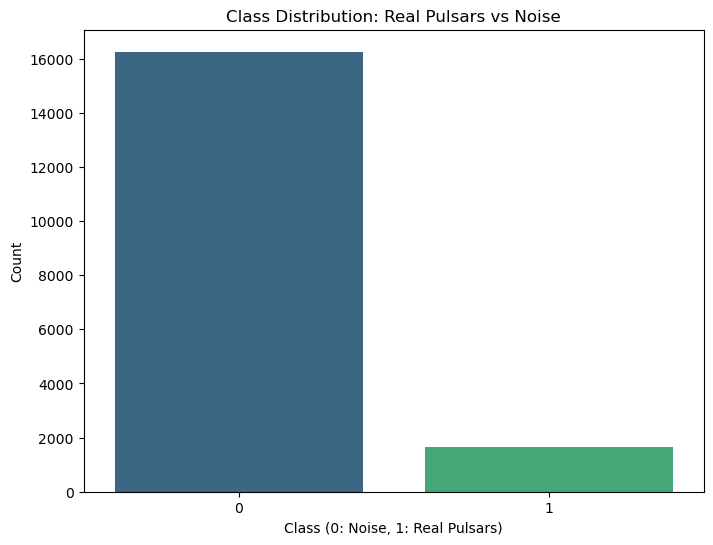

In [6]:
# Class distribution visualization
plt.figure(figsize=(8, 6))
sns.countplot(x="Label", data=data, palette="viridis")
plt.title("Class Distribution: Real Pulsars vs Noise")
plt.xlabel("Class (0: Noise, 1: Real Pulsars)")
plt.ylabel("Count")
plt.show()

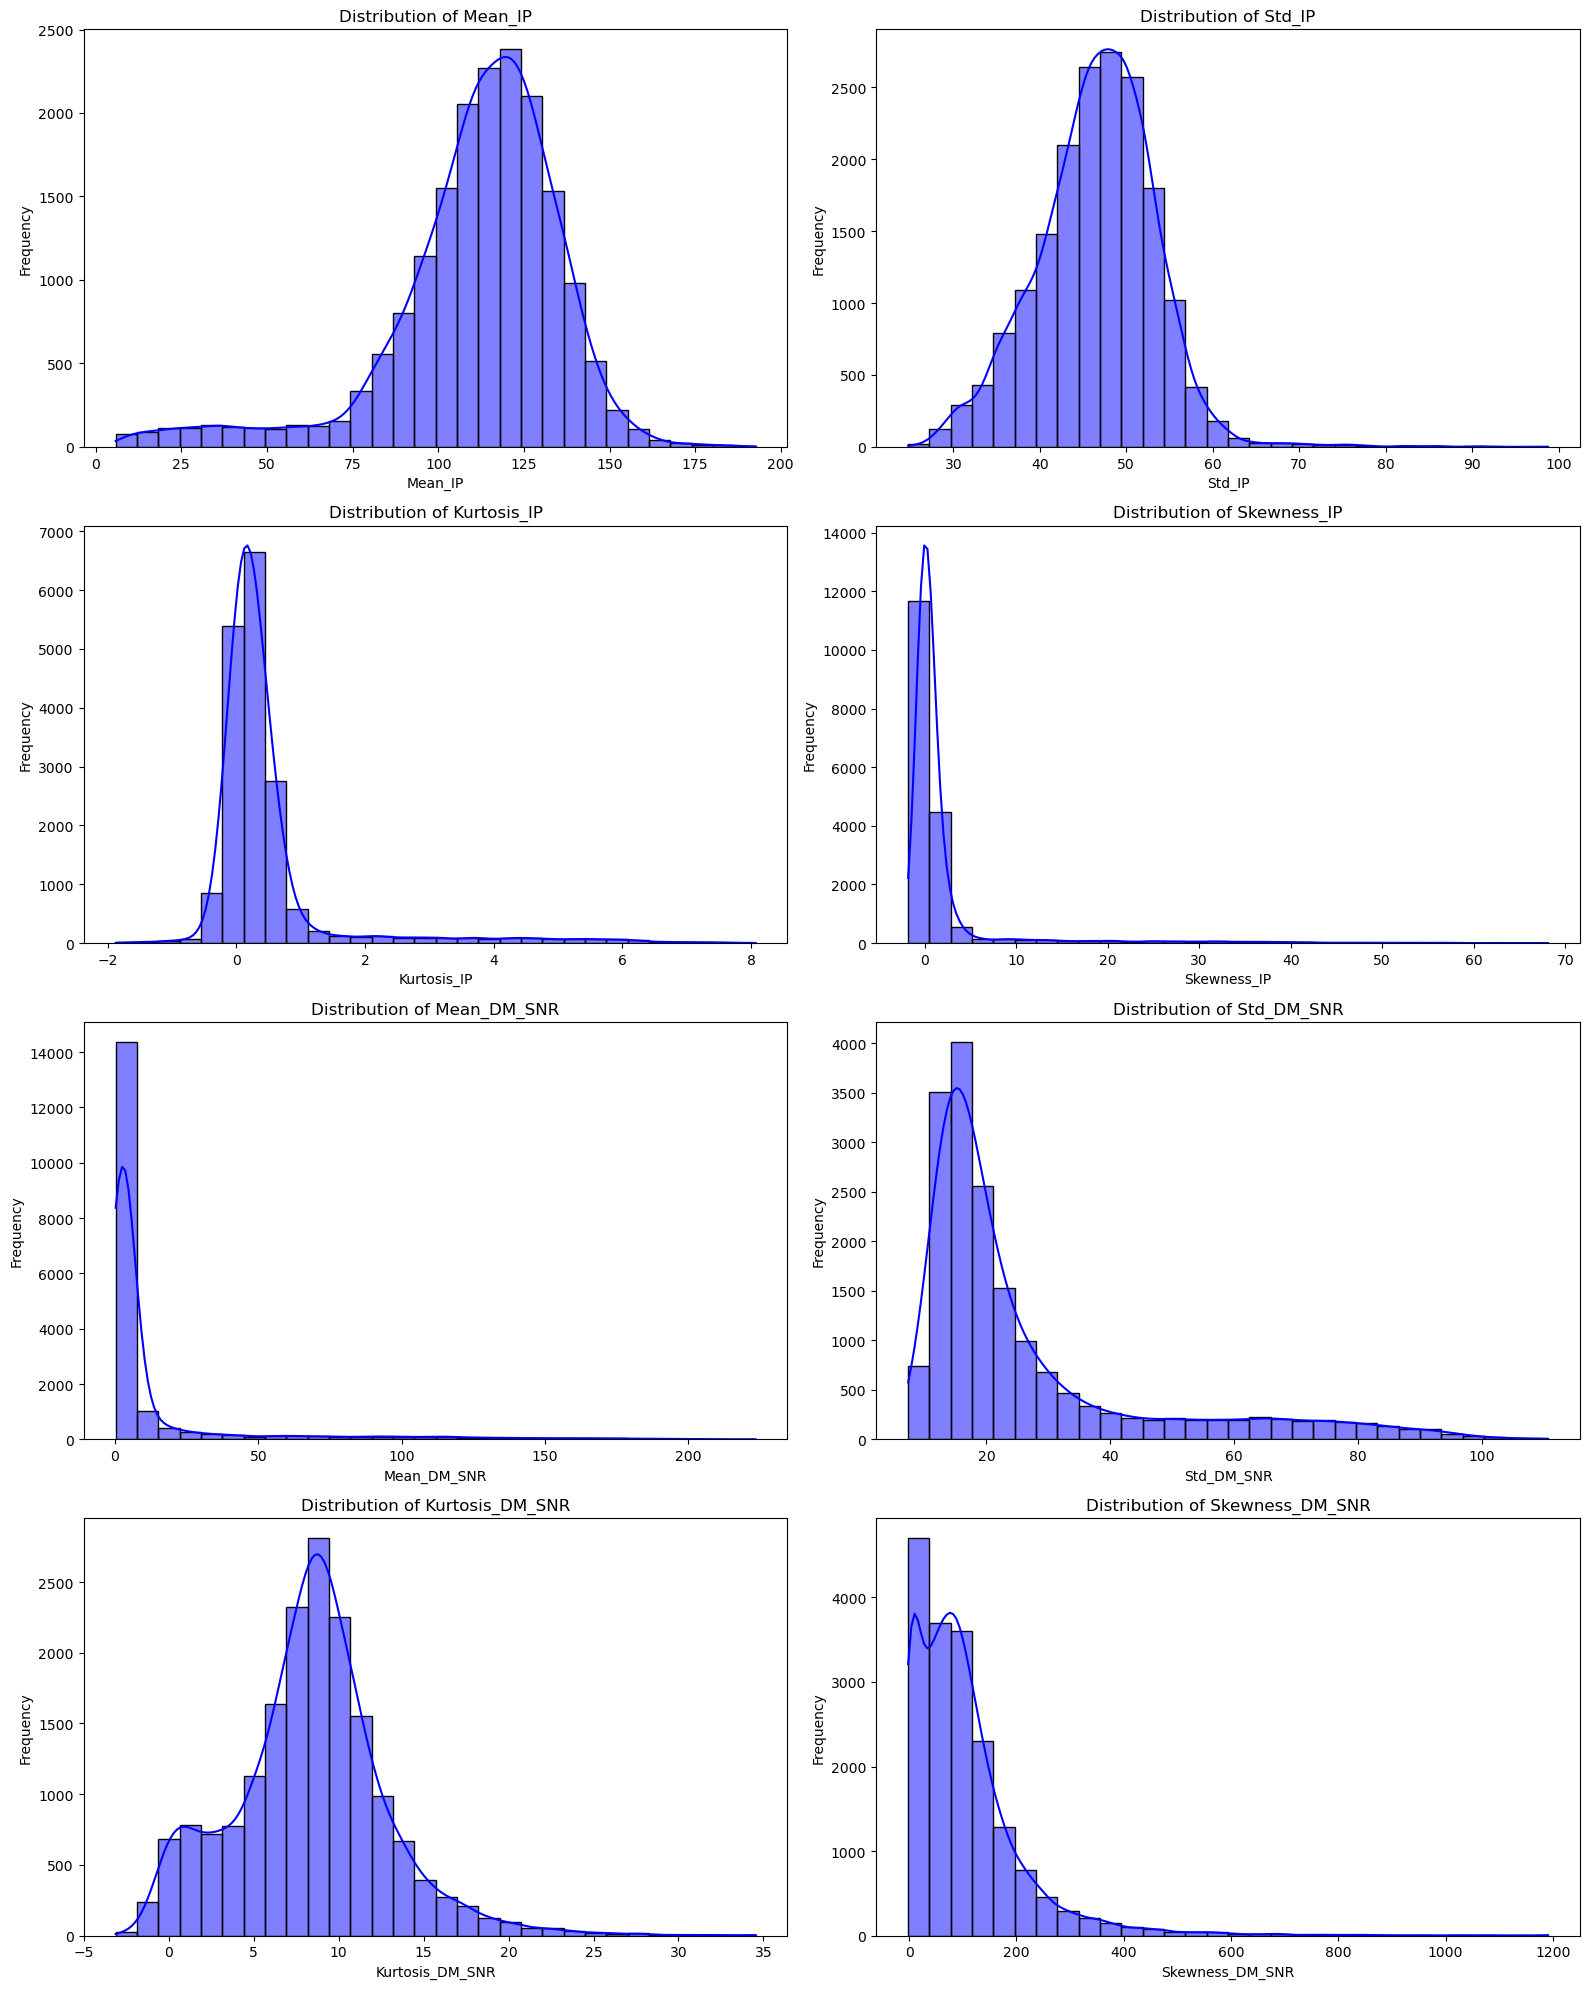

In [12]:
# Feature distributions
features = data.columns[:-1]
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i], color="blue", bins=30)
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [8]:
for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i], color="blue", bins=30)
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

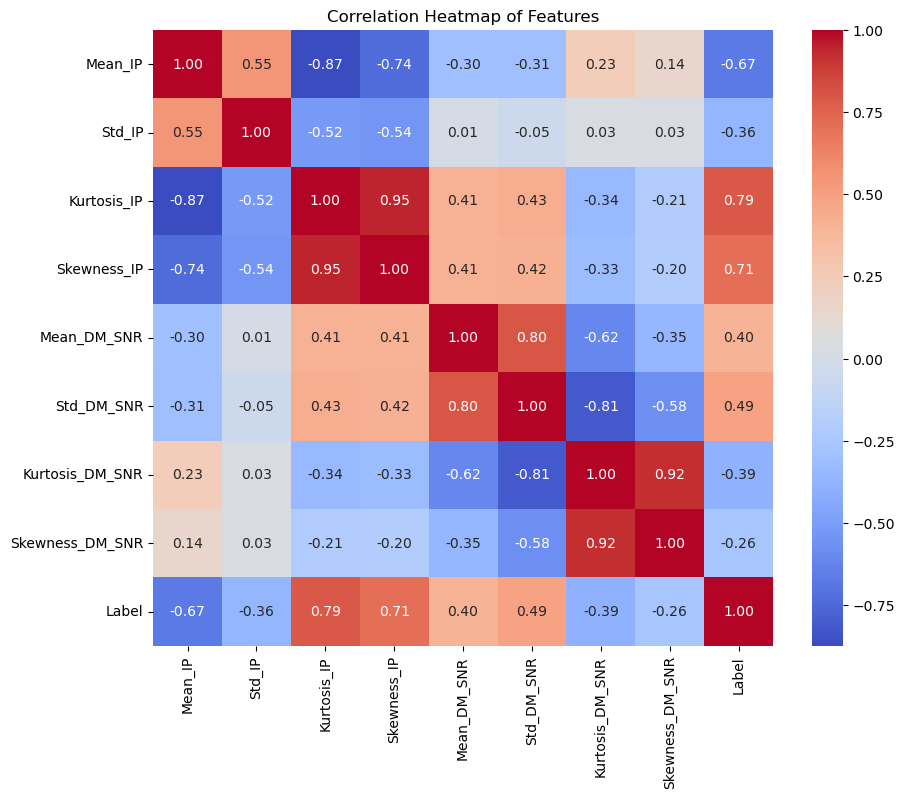

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

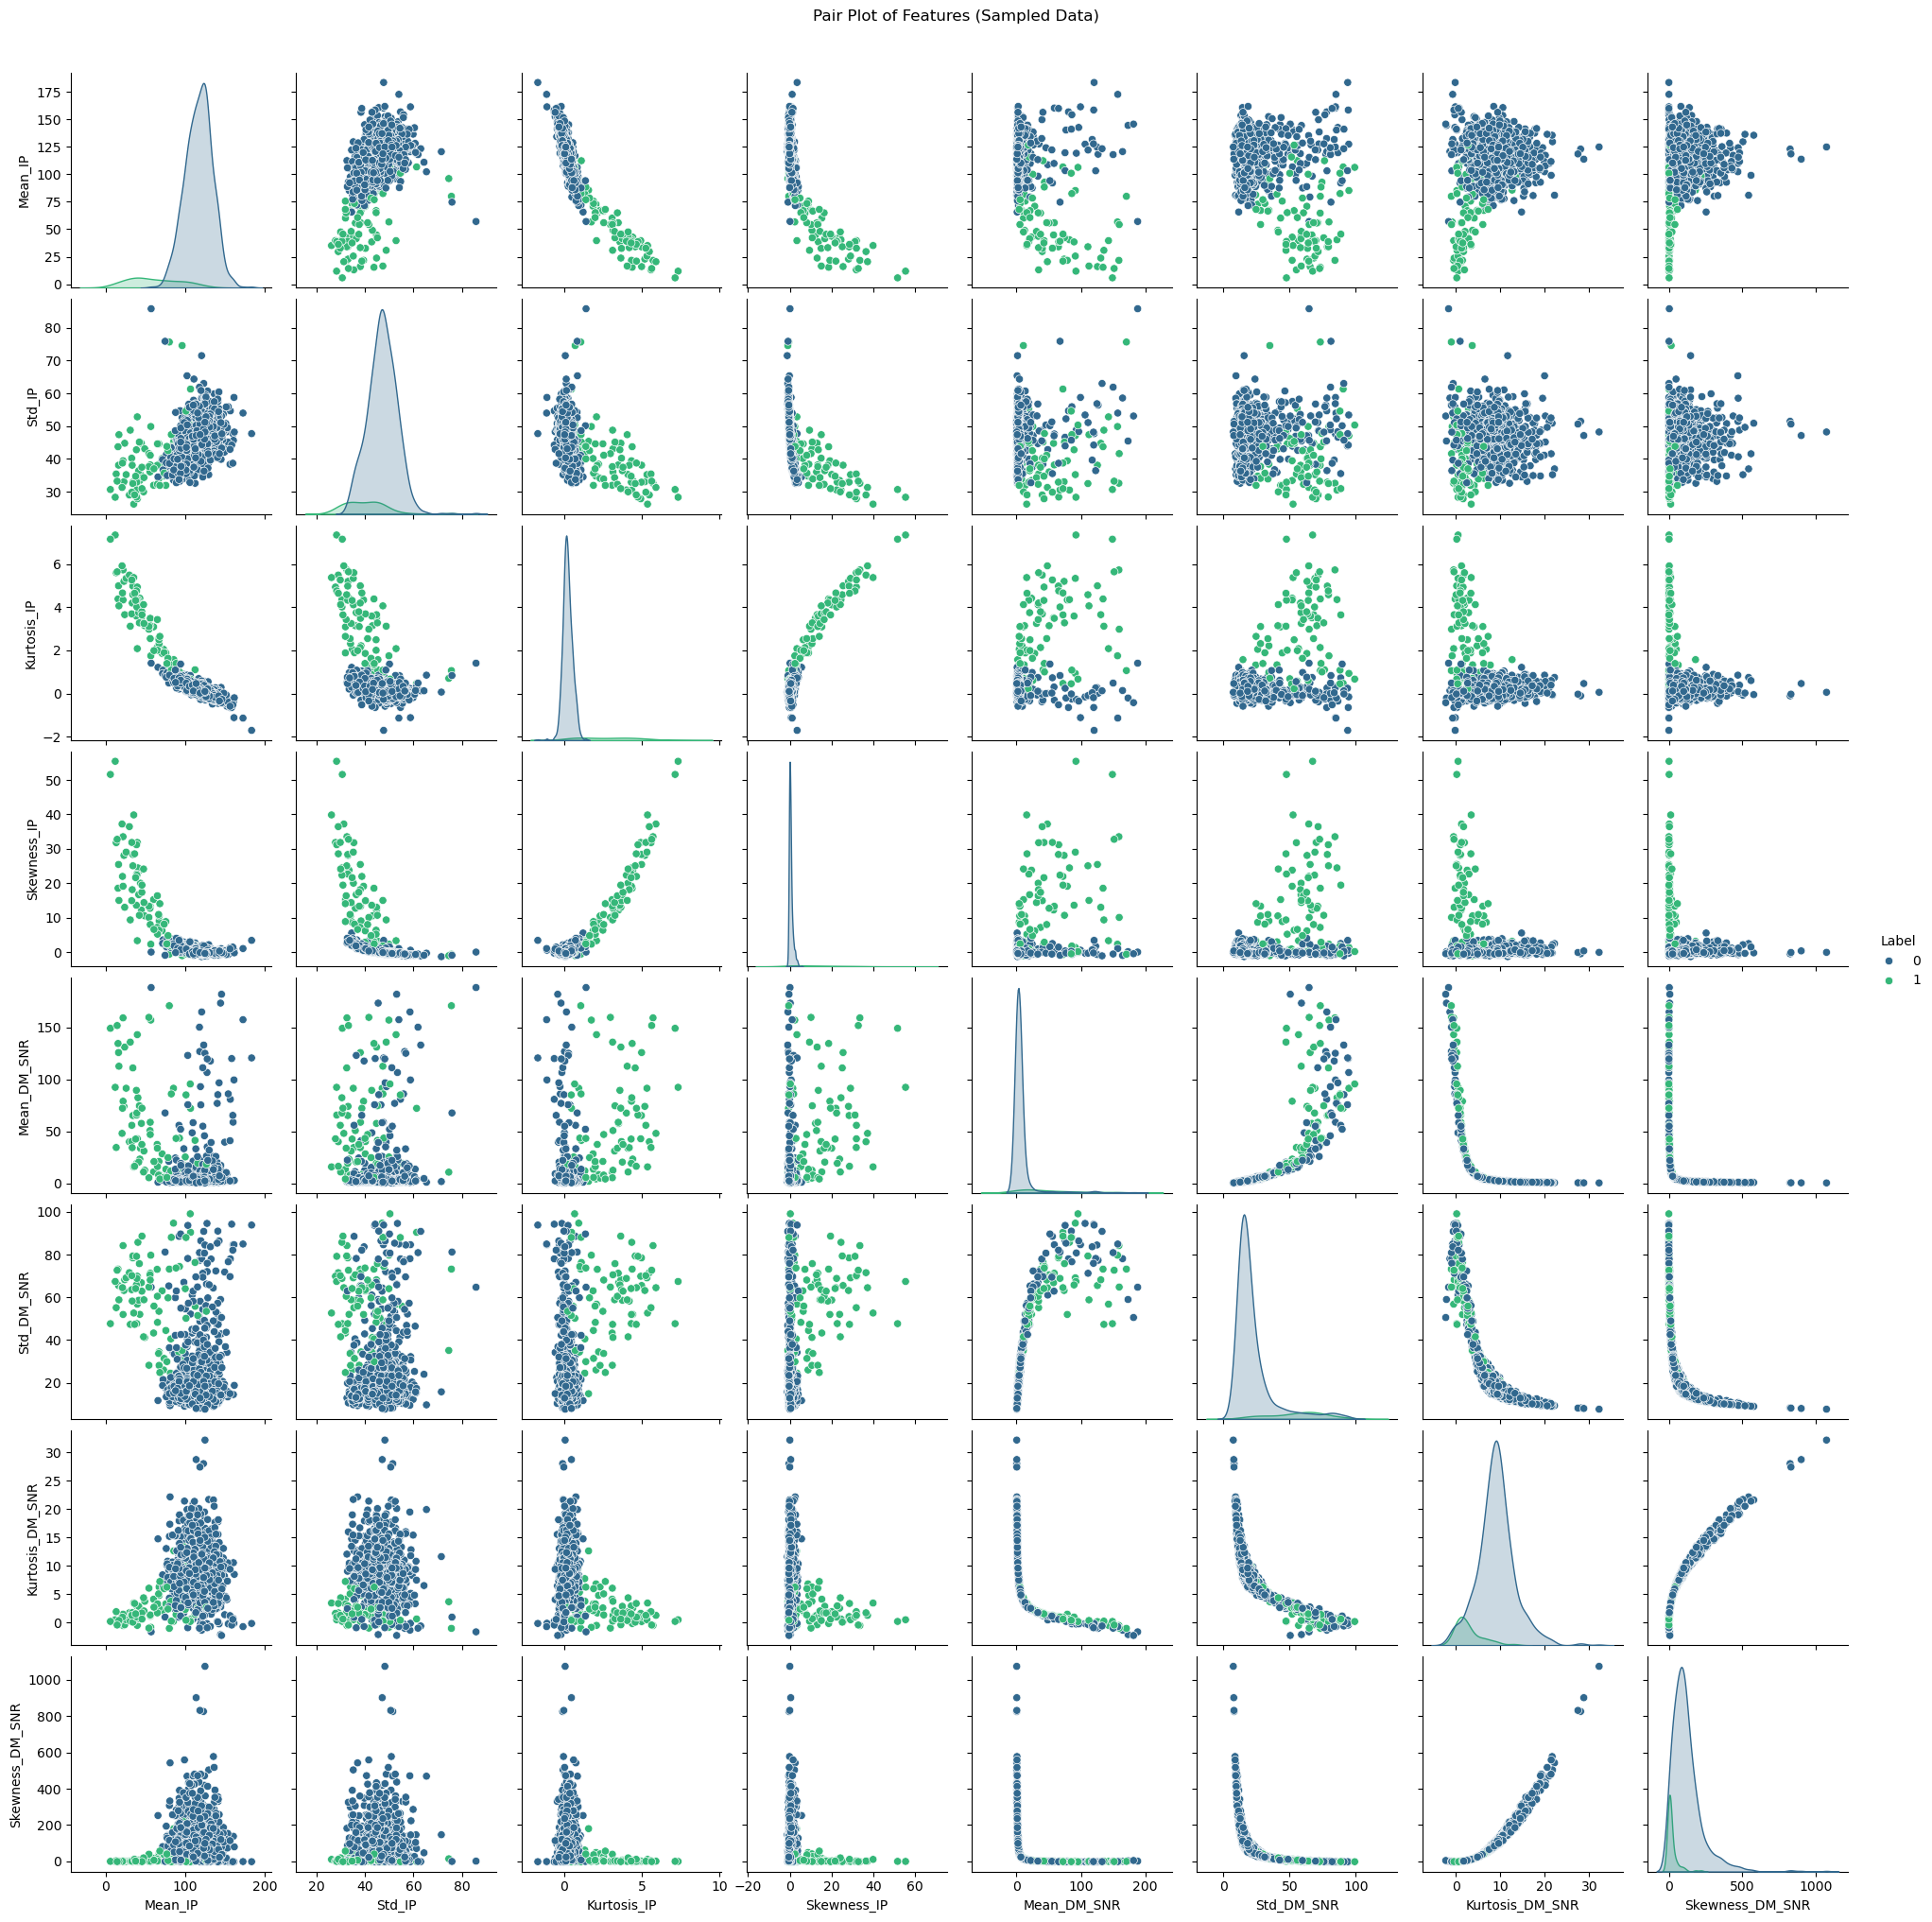

In [10]:
# Pair plot for feature relationships (sampled for better visualization)
sampled_data = data.sample(1000)  # Sample 1000 points for visualization
sns.pairplot(sampled_data, hue="Label", palette="viridis", diag_kind="kde")
plt.suptitle("Pair Plot of Features (Sampled Data)", y=1.02)
plt.show()